In [2]:
# First grab net radiation

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

#read rn dataframe
df = pd.read_csv('elder_20120531_20150101.csv')
df.columns = ['time','rn','rn_flag','rn_wind','rn_wind_flag']
rng = pd.to_datetime(df.time)

#index by time, set negative rn to zero, resample to daily data
ts = pd.DataFrame(df['rn_wind'].tolist(),index=rng,columns=['rn'])
ts.ix[ts.rn<=0,'rn']=0
ts2 = ts.resample('1D').mean()
ts2['rn']= 86400.0*ts2['rn']

#write to model folder
#units of Joules/(day*m^2)
pickle.dump( ts2, open( '/Users/daviddralle/Dropbox/research/streamflow_temp/raw_data/rn/rn.p', "wb" ) )


/Users/daviddralle/anaconda2/envs/py2k_gis/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


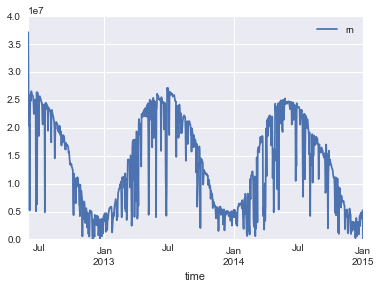

In [9]:
ts2.plot()

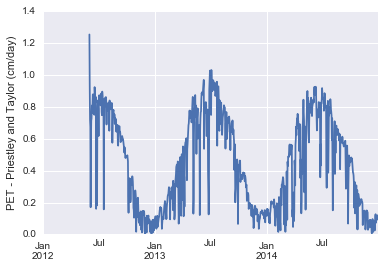

In [12]:
dfs = pickle.load( open( '/Users/daviddralle/Dropbox/research/streamflow_temp/model_data/rew_forcing_dict.p', "rb" ) )
dfs[2]['pet'].plot()
plt.ylabel('PET - Priestley and Taylor (cm/day)')
plt.savefig('/Users/daviddralle/desktop/myfig.pdf', format='pdf')

/Users/daviddralle/anaconda2/envs/py2k_gis/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


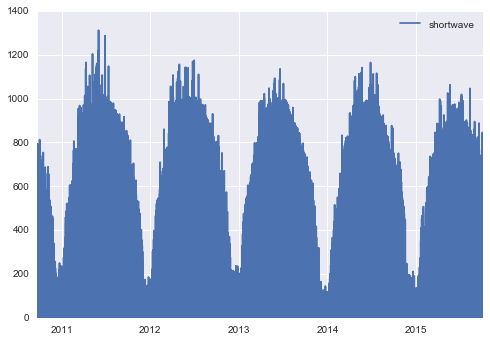

In [1]:

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os

# have to do some trickery to read shortwave data from Angelo. Missing some dates. 
df = pd.read_csv('shortwave_angelo_2010_2015.csv')

df.columns = ['time','shortwave','flag']
currng = pd.to_datetime(df.time)
delta = pd.to_datetime(df.time[1]) - pd.to_datetime(df.time[0])
rng = pd.date_range(pd.to_datetime(df.time[0]), pd.to_datetime(df.time[len(df.time)-1]), freq=delta)

df = pd.DataFrame(df.shortwave.tolist(), index=currng, columns=['shortwave'])
df = df.reindex(rng, fill_value=np.nan)

#Gotta fill in some missing days. 
#only some winter months are missing. Fill in with means of other years
short = []
for date in rng:
    if np.isfinite(df['shortwave'][date]):
        short.append(df['shortwave'][date])
    else:
        other_dates = (df.index.day==date.day)&(df.index.minute==date.minute)&(df.index.month==date.month)&((df.index.hour==date.hour))
        short.append(np.mean(df['shortwave'][other_dates]))
    
df = pd.DataFrame(short,index=rng,columns=['shortwave'])
df.plot()
#pickle.dump(ts, open('/Users/daviddralle/Dropbox/research/streamflow_temp/raw_data/shortwave/shortwave.p', 'wb'))